<a href="https://colab.research.google.com/github/ljabbie/lj/blob/main/hw8_2c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
from scipy.integrate import odeint
import copy
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})

##2C.
Effect of changing T on a(z) & X(z) plots?

In [2]:
def coupled_odes_2(X, Z):

  density_cat = 50  # kg-cat/m^3
  k_b = 0.003344 # Replacing k_prime with k_b kmol/kg-cat*s*atm^2
  PA0 = 12 # atm
  CA0 = 0.22 # kmol/m^3
  U0 = 2.5 # m/s
  
  ddZ = np.zeros(1, dtype=float) # initialize an empty array
  ddZ = ((density_cat)*(1/(1+12*((Z/(2.5+(5*X)))**.5)))*k_b*((PA0*(1-X)/(1+(2*X)))**2))/U0*CA0
  
  
  return ddZ

In [3]:
Z = np.arange(0.,20.,.2)

XA0 = 0.0  #Initial conversion

sol_2 = odeint(coupled_odes_2, XA0, Z)    # solve the ODE
a = (1/(1+12*((Z/(2.5+(5*sol_2[:,0])))**.5)))  # solve for a

In [4]:
print(sol_2[:,0])
print(a)


[0.         0.10579386 0.1495867  0.17929636 0.20204929 0.22057483
 0.23623591 0.2498185  0.26181975 0.2725752  0.28232254 0.29123658
 0.29944983 0.30706515 0.31416412 0.32081252 0.32706423 0.33296392
 0.33854904 0.34385135 0.34889801 0.35371238 0.35831478 0.36272294
 0.36695245 0.37101708 0.37492908 0.37869935 0.38233768 0.38585287
 0.38925286 0.39254485 0.39573538 0.39883041 0.4018354  0.40475535
 0.40759484 0.4103581  0.41304905 0.41567128 0.41822815 0.42072276
 0.42315801 0.4255366  0.42786103 0.43013366 0.43235669 0.43453219
 0.4366621  0.43874822 0.4407923  0.44279592 0.44476064 0.44668787
 0.448579   0.4504353  0.452258   0.45404826 0.45580718 0.45753579
 0.45923511 0.46090607 0.46254958 0.46416648 0.46575761 0.46732375
 0.46886563 0.47038398 0.47187949 0.47335279 0.47480453 0.4762353
 0.47764567 0.47903621 0.48040744 0.48175987 0.48309398 0.48441026
 0.48570916 0.4869911  0.48825652 0.48950581 0.49073937 0.49195757
 0.49316077 0.49434933 0.49552359 0.49668386 0.49783047 0.49896

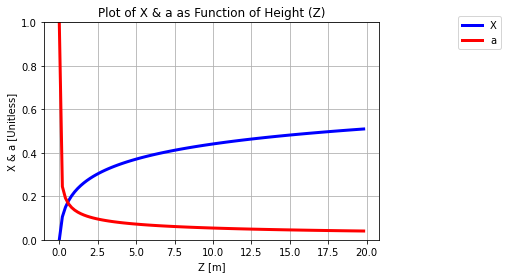

In [6]:
plt.plot(Z, sol_2[:,0], '-', color = "blue", linewidth = 3, label= "X")
plt.plot(Z, a, '-',  color="red", linewidth = 3, label="a")
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1.05))
plt.title("Plot of X & a as Function of Height (Z)")
plt.xlabel("Z [m]")
plt.ylabel("X & a [Unitless]")
plt.ylim([0,1])
plt.grid()
plt.show()